In [ ]:
# (c) Saeed Khan

# Preamble
import numpy as np
import scipy as sp
import math
import os
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import time

# Import qutip
from qutip import *

##### Linear and nonlinear QS coupled to single-mode QNP<a id='QRC2' />

Linear QRC

In [ ]:
# Define Hilbert space and operators for single Kerr QS coupled to single-mode QRC

# Number of classes
C = 2

# Hilbert space cutoff
# Na, Nb = 30, 30
# Na, Nb = 25, 25
Na, Nb = 26, 26
# Na, Nb = 20, 20

# Time evolution parameters
t0, tF, tS = 0.0, 35.0, 0.01
tList = np.arange(t0, tF, tS)

# Initial state
rho0 = tensor(basis(Na,0),basis(Nb,0))

# Operators
a = tensor(destroy(Na),qeye(Nb))
b = tensor(qeye(Na),destroy(Nb))

# Fixed QRC parameters
Lambda1, DeltaDB1, gamma1 = 0.0, 0.0, 1.0

# Dissipative coupling parameter
CGamma = 0.5

# List of moments
momentsListFull = [[0,1],[1,1],[0,2],[1,2],[0,3]]

# Storage matrices
qrcOutput = np.zeros(C, dtype=complex)
cumulantsQutip    = np.zeros((len(momentsListFull),C), dtype=complex)

# Loop over operating points
sT = time.time()
for nh in range(C):

    # Extract QS parameters
    if nh == 0:

        # Fixed Kerr oscillator parameters
        DeltaVal = -3.99895702e-01
        gamma = 0.5
        CGamma = 0.5
        LambdaVal = 2.59808612e-01
        etaVal = 1.0
        phiEtaVal = 2.8186686686686686
        nth = 0.5 # Thermal bath

        # Define Kerr QS Hamiltonian
        H = -DeltaVal*a.dag()*a - (LambdaVal/2)*a.dag()*a.dag()*a*a + etaVal*np.exp(-1j*phiEtaVal)*a + etaVal*np.exp(+1j*phiEtaVal)*a.dag() 

        # Define QRC Hamiltonian
        H += -DeltaDB1*b.dag()*b - (Lambda1/2)*b.dag()*b.dag()*b*b 

        # Define coupling Hamiltonian
        H += (1j/2)*CGamma*a.dag()*b - (1j/2)*CGamma*b.dag()*a

        # Define collapse operators
        c_ops = []
        c_ops.append( np.sqrt(gamma*(nth+1))*a )
        if nth > 0.0:
            c_ops.append( np.sqrt(gamma*nth)*a.dag() )

        # Local collapse operators
        c_ops.append( np.sqrt(gamma1)*b )

        # Dissipative coupling operator
        c_ops.append( np.sqrt(CGamma)*(a+b) )

    else:

        # Linear QS parameters
        gamma = 0.5
        CGamma = 0.5
        eta = -0.987441
        phiEta = 0.090551
        ga = 0.18969
        nth = 0.97893

        # Define Linear QS Hamiltonian
        H = eta*np.exp(-1j*phiEta)*a + eta*np.exp(+1j*phiEta)*a.dag() - 1j*(ga/2)*a*a + 1j*(ga/2)*a.dag()*a.dag()

        # Define QRC Hamiltonian
        H += -DeltaDB1*b.dag()*b - (Lambda1/2)*b.dag()*b.dag()*b*b 

        # Define coupling Hamiltonian
        H += (1j/2)*CGamma*a.dag()*b - (1j/2)*CGamma*b.dag()*a

        # Define collapse operators
        c_ops = []
        c_ops.append( np.sqrt(gamma*(nth+1))*a )
        if nth > 0.0:
            c_ops.append( np.sqrt(gamma*nth)*a.dag() )

        # Local collapse operators
        c_ops.append( np.sqrt(gamma1)*b )

        # Dissipative coupling operator
        c_ops.append( np.sqrt(CGamma)*(a+b) )


    # Calculate steady-state density matrix
    # rhoSS = steadystate(H, c_ops)
    result = mesolve(H, rho0, tList, c_ops, [], options={'progress_bar': True})
    rhoSS = result.states[-1]

    # Calculate quadrature expectation values
    qrcOutput[nh] = expect(b, rhoSS)

    # Calculate cumulants
    cumulantsQutip[0,nh] = expect(a, rhoSS)
    cumulantsQutip[1,nh] = expect(a.dag()*a, rhoSS) - np.abs(expect(a, rhoSS))**2
    cumulantsQutip[2,nh] = expect(a*a, rhoSS) - (expect(a, rhoSS))**2
    cumulantsQutip[3,nh] = expect(a.dag()*a*a, rhoSS) - 2*(expect(a.dag()*a, rhoSS) - np.abs(expect(a, rhoSS))**2)*expect(a, rhoSS) - (expect(a*a, rhoSS) - (expect(a, rhoSS))**2)*expect(a.dag(), rhoSS) - expect(a.dag(), rhoSS)*expect(a, rhoSS)*expect(a, rhoSS)
    cumulantsQutip[4,nh] = expect(a*a*a, rhoSS) - 3*(expect(a*a, rhoSS) - (expect(a, rhoSS))**2)*expect(a, rhoSS) - expect(a, rhoSS)*expect(a, rhoSS)*expect(a, rhoSS)

eT = time.time()
print('Done! Elapsed time: ' + str(eT-sT))

10.0%. Run time:  71.39s. Est. time left: 00:00:10:42
20.0%. Run time: 191.78s. Est. time left: 00:00:12:46
30.0%. Run time: 308.65s. Est. time left: 00:00:11:59
40.0%. Run time: 422.14s. Est. time left: 00:00:10:32
50.0%. Run time: 530.29s. Est. time left: 00:00:08:49
60.0%. Run time: 628.10s. Est. time left: 00:00:06:58
70.0%. Run time: 722.37s. Est. time left: 00:00:05:09
80.0%. Run time: 824.31s. Est. time left: 00:00:03:25
90.0%. Run time: 920.23s. Est. time left: 00:00:01:41
100.0%. Run time: 1014.56s. Est. time left: 00:00:00:00
Total run time: 1014.56s
10.0%. Run time:  69.74s. Est. time left: 00:00:10:27
20.0%. Run time: 170.31s. Est. time left: 00:00:11:20
30.0%. Run time: 268.46s. Est. time left: 00:00:10:26
40.0%. Run time: 359.73s. Est. time left: 00:00:08:59
50.0%. Run time: 448.65s. Est. time left: 00:00:07:28
60.0%. Run time: 539.93s. Est. time left: 00:00:05:59
70.0%. Run time: 629.54s. Est. time left: 00:00:04:29
80.0%. Run time: 718.68s. Est. time left: 00:00:02:59
9

Kerr QNP

In [ ]:
# Define Hilbert space and operators for single Kerr QS coupled to single-mode QNP

# Number of classes
C = 2

# Hilbert space cutoff
# Na, Nb = 30, 30
# Na, Nb = 25, 25
Na, Nb = 26, 26
# Na, Nb = 20, 20

# Time evolution parameters
t0, tF, tS = 0.0, 35.0, 0.01
tList = np.arange(t0, tF, tS)

# Initial state
rho0 = tensor(basis(Na,0),basis(Nb,0))

# Operators
a = tensor(destroy(Na),qeye(Nb))
b = tensor(qeye(Na),destroy(Nb))

# Fixed QRC parameters
Lambda1, DeltaDB1, gamma1 = 0.6, -1.0, 1.0

# Dissipative coupling parameter
CGamma = 0.5

# List of moments
momentsListFull = [[0,1],[1,1],[0,2],[1,2],[0,3]]

# Storage matrices
qrcOutput_Kerr = np.zeros(C, dtype=complex)
cumulantsQutip_Kerr = np.zeros((len(momentsListFull),C), dtype=complex)
cumulantsQutip_QRC  = np.zeros((len(momentsListFull),C), dtype=complex)

# Loop over operating points
sT = time.time()
for nh in range(C):

    # Extract QS parameters
    if nh == 0:

        # Fixed Kerr oscillator parameters
        DeltaVal = -3.99895702e-01
        gamma = 0.5
        CGamma = 0.5
        LambdaVal = 2.59808612e-01
        etaVal = 1.0
        phiEtaVal = 2.8186686686686686
        nth = 0.5 # Thermal bath

        # Define Kerr QS Hamiltonian
        H = -DeltaVal*a.dag()*a - (LambdaVal/2)*a.dag()*a.dag()*a*a + etaVal*np.exp(-1j*phiEtaVal)*a + etaVal*np.exp(+1j*phiEtaVal)*a.dag() 

        # Define QRC Hamiltonian
        H += -DeltaDB1*b.dag()*b - (Lambda1/2)*b.dag()*b.dag()*b*b 

        # Define coupling Hamiltonian
        H += (1j/2)*CGamma*a.dag()*b - (1j/2)*CGamma*b.dag()*a

        # Define collapse operators
        c_ops = []
        c_ops.append( np.sqrt(gamma*(nth+1))*a )
        if nth > 0.0:
            c_ops.append( np.sqrt(gamma*nth)*a.dag() )

        # Local collapse operators
        c_ops.append( np.sqrt(gamma1)*b )

        # Dissipative coupling operator
        c_ops.append( np.sqrt(CGamma)*(a+b) )

    else:

        # Linear QS parameters
        gamma = 0.5
        CGamma = 0.5
        eta = -0.987441
        phiEta = 0.090551
        ga = 0.18969
        nth = 0.97893

        # Define Linear QS Hamiltonian
        H = eta*np.exp(-1j*phiEta)*a + eta*np.exp(+1j*phiEta)*a.dag() - 1j*(ga/2)*a*a + 1j*(ga/2)*a.dag()*a.dag()

        # Define QRC Hamiltonian
        H += -DeltaDB1*b.dag()*b - (Lambda1/2)*b.dag()*b.dag()*b*b 

        # Define coupling Hamiltonian
        H += (1j/2)*CGamma*a.dag()*b - (1j/2)*CGamma*b.dag()*a

        # Define collapse operators
        c_ops = []
        c_ops.append( np.sqrt(gamma*(nth+1))*a )
        if nth > 0.0:
            c_ops.append( np.sqrt(gamma*nth)*a.dag() )

        # Local collapse operators
        c_ops.append( np.sqrt(gamma1)*b )

        # Dissipative coupling operator
        c_ops.append( np.sqrt(CGamma)*(a+b) )


    # Calculate steady-state density matrix
    # rhoSS = steadystate(H, c_ops)
    result = mesolve(H, rho0, tList, c_ops, [], options={'progress_bar': True})
    rhoSS = result.states[-1]

    # Calculate quadrature expectation values
    qrcOutput_Kerr[nh] = expect(b, rhoSS)

    # Calculate cumulants
    cumulantsQutip_Kerr[0,nh] = expect(a, rhoSS)
    cumulantsQutip_Kerr[1,nh] = expect(a.dag()*a, rhoSS) - np.abs(expect(a, rhoSS))**2
    cumulantsQutip_Kerr[2,nh] = expect(a*a, rhoSS) - (expect(a, rhoSS))**2
    cumulantsQutip_Kerr[3,nh] = expect(a.dag()*a*a, rhoSS) - 2*(expect(a.dag()*a, rhoSS) - np.abs(expect(a, rhoSS))**2)*expect(a, rhoSS) - (expect(a*a, rhoSS) - (expect(a, rhoSS))**2)*expect(a.dag(), rhoSS) - expect(a.dag(), rhoSS)*expect(a, rhoSS)*expect(a, rhoSS)
    cumulantsQutip_Kerr[4,nh] = expect(a*a*a, rhoSS) - 3*(expect(a*a, rhoSS) - (expect(a, rhoSS))**2)*expect(a, rhoSS) - expect(a, rhoSS)*expect(a, rhoSS)*expect(a, rhoSS)

    # Calculate cumulants for QRC
    cumulantsQutip_QRC[0,nh] = expect(b, rhoSS)
    cumulantsQutip_QRC[1,nh] = expect(b.dag()*b, rhoSS) - np.abs(expect(b, rhoSS))**2
    cumulantsQutip_QRC[2,nh] = expect(b*b, rhoSS) - (expect(b, rhoSS))**2
    cumulantsQutip_QRC[3,nh] = expect(b.dag()*b*b, rhoSS) - 2*(expect(b.dag()*b, rhoSS) - np.abs(expect(b, rhoSS))**2)*expect(b, rhoSS) - (expect(b*b, rhoSS) - (expect(b, rhoSS))**2)*expect(b.dag(), rhoSS) - expect(b.dag(), rhoSS)*expect(b, rhoSS)*expect(b, rhoSS)
    cumulantsQutip_QRC[4,nh] = expect(b*b*b, rhoSS) - 3*(expect(b*b, rhoSS) - (expect(b, rhoSS))**2)*expect(b, rhoSS) - expect(b, rhoSS)*expect(b, rhoSS)*expect(b, rhoSS)

eT = time.time()
print('Done! Elapsed time: ' + str(eT-sT))

10.0%. Run time:  82.96s. Est. time left: 00:00:12:26
20.0%. Run time: 201.52s. Est. time left: 00:00:13:25
30.0%. Run time: 325.18s. Est. time left: 00:00:12:38
40.0%. Run time: 449.20s. Est. time left: 00:00:11:13
50.0%. Run time: 574.58s. Est. time left: 00:00:09:34
60.0%. Run time: 698.58s. Est. time left: 00:00:07:45
70.0%. Run time: 823.24s. Est. time left: 00:00:05:52
80.0%. Run time: 947.70s. Est. time left: 00:00:03:56
90.0%. Run time: 1072.90s. Est. time left: 00:00:01:58
100.0%. Run time: 1198.08s. Est. time left: 00:00:00:00
Total run time: 1198.09s
10.0%. Run time:  76.33s. Est. time left: 00:00:11:26
20.0%. Run time: 171.68s. Est. time left: 00:00:11:26
30.0%. Run time: 265.55s. Est. time left: 00:00:10:19
40.0%. Run time: 358.91s. Est. time left: 00:00:08:58
50.0%. Run time: 452.69s. Est. time left: 00:00:07:32
60.0%. Run time: 545.35s. Est. time left: 00:00:06:03
70.0%. Run time: 638.03s. Est. time left: 00:00:04:33
80.0%. Run time: 732.78s. Est. time left: 00:00:03:02


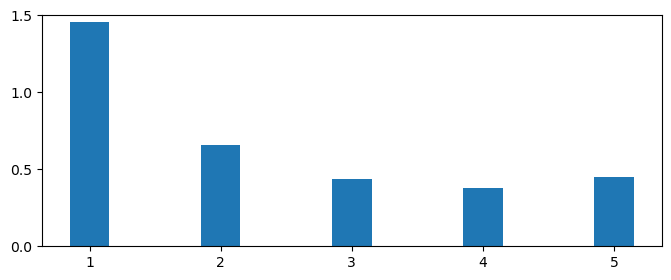

In [ ]:
# Bar plots of cumulants for non-Gaussian state
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.bar(np.arange(1,np.shape(momentsListFull)[0]+1,1), np.abs(cumulantsQutip_Kerr[:,0]), width=0.3 )

ax.set_ylim([0,1.5])
ax.set_yticks([0,0.5,1.0,1.5])

plt.show()

fig.savefig('barTaskCumulants0.pdf')

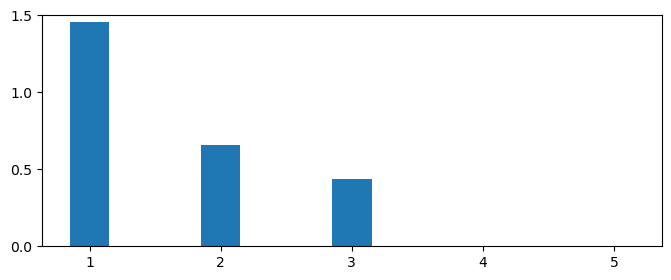

In [ ]:
# Bar plots of cumulants for Gaussian state
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.bar(np.arange(1,np.shape(momentsListFull)[0]+1,1), np.abs(cumulantsQutip_Kerr[:,1]), width=0.3 )

ax.set_ylim([0,1.5])
ax.set_yticks([0,0.5,1.0,1.5])

plt.show()

fig.savefig('barTaskCumulants1.pdf')

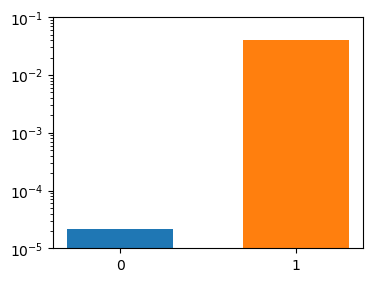

In [ ]:
# Bar plots of first-order cumulant difference magnitude for linear system vs QNP
fig, ax = plt.subplots(1, 1, figsize=(4,3))

ax.bar(0, np.abs(qrcOutput[0]-qrcOutput[1]), width=0.6 )
ax.bar(1, np.abs(qrcOutput_Kerr[0]-qrcOutput_Kerr[1]), width=0.6 )
ax.set_yscale('log')

ax.set_ylim([1e-5,1e-1])
ax.set_xticks([0,1])
ax.set_xlim([-0.38,1.38])

plt.show()

fig.savefig('barTaskDeltaMu.pdf')